In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
Al = pd.read_csv (r"C:\Users\kamil\OneDrive\Desktop\Spring 2021\Financial Econometrics 5340\flights.csv")

#Al = pd.read_csv(r"C:\Users\kamil\OneDrive\Desktop\Spring 2021\Financial Econometrics 5340\flights.csv")


In [201]:
# # (rows, columns)
print(Al.shape)

(253316, 11)


In [203]:
#View first few rows:
print(Al.head())

   year  month  day  dep_delay  arr_delay carrier origin dest  air_time  \
0  2014      1    1         14         13      AA    JFK  LAX       359   
1  2014      1    1         -3         13      AA    JFK  LAX       363   
2  2014      1    1          2          9      AA    JFK  LAX       351   
3  2014      1    1         -8        -26      AA    LGA  PBI       157   
4  2014      1    1          2          1      AA    JFK  LAX       350   

   distance  hour  
0      2475     9  
1      2475    11  
2      2475    19  
3      1035     7  
4      2475    13  


In [205]:
#View column names:
print(Al.columns)

Index(['year', 'month', 'day', 'dep_delay', 'arr_delay', 'carrier', 'origin',
       'dest', 'air_time', 'distance', 'hour'],
      dtype='object')


In [207]:
#Check data types:
print(Al.dtypes)

year          int64
month         int64
day           int64
dep_delay     int64
arr_delay     int64
carrier      object
origin       object
dest         object
air_time      int64
distance      int64
hour          int64
dtype: object


In [209]:
#Basic info
Al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253316 entries, 0 to 253315
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   year       253316 non-null  int64 
 1   month      253316 non-null  int64 
 2   day        253316 non-null  int64 
 3   dep_delay  253316 non-null  int64 
 4   arr_delay  253316 non-null  int64 
 5   carrier    253316 non-null  object
 6   origin     253316 non-null  object
 7   dest       253316 non-null  object
 8   air_time   253316 non-null  int64 
 9   distance   253316 non-null  int64 
 10  hour       253316 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 21.3+ MB


In [211]:
#Summary Statistics
Al.describe()

,year,month,day,dep_delay,arr_delay,air_time,distance,hour
count,253316.0,253316.000000,253316.000000,253316.000000,253316.000000,253316.000000,253316.000000,253316.000000
mean,2014.0,5.638578,15.893698,12.465265,8.146702,156.722824,1099.445274,13.063435
std,0.0,2.820866,8.763097,41.648763,45.749452,96.129776,752.982282,4.897891
min,2014.0,1.000000,1.000000,-112.000000,-112.000000,20.000000,80.000000,0.000000
25%,2014.0,3.000000,8.000000,-5.000000,-15.000000,86.000000,533.000000,9.000000
50%,2014.0,6.000000,16.000000,-1.000000,-4.000000,134.000000,944.000000,13.000000
75%,2014.0,8.000000,23.000000,11.000000,15.000000,199.000000,1416.000000,17.000000
max,2014.0,10.000000,31.000000,1498.000000,1494.000000,706.000000,4983.000000,24.000000


In [213]:
#Clean the Data (if needed)
Al.isnull().sum()


year         0
month        0
day          0
dep_delay    0
arr_delay    0
carrier      0
origin       0
dest         0
air_time     0
distance     0
hour         0
dtype: int64

In [215]:
# Drop rows with any missing values
Al.dropna(inplace=True)           
# or
## Replace NaNs with 0
Al.fillna(0, inplace=True)        


In [217]:
#Remove duplicates:
Al.drop_duplicates(inplace=True)


In [219]:
carrier_names = {
    'UA': 'United Airlines',
    'B6': 'JetBlue',
    'DL': 'Delta',
    'EV': 'ExpressJet',
    'AA': 'American Airlines',
    'MQ': 'Envoy Air',
    'US': 'US Airways',
    'WN': 'Southwest',
    'VX': 'Virgin America',
    'FL': 'AirTran',
}

# Create a readable DataFrame
flight_df = Al['carrier'].value_counts().rename_axis('Carrier').reset_index(name='Flight Count')
flight_df['Airline'] = flight_df['Carrier'].map(carrier_names)
print(flight_df[['Airline', 'Flight Count']])


              Airline  Flight Count
0     United Airlines         46267
1             JetBlue         44479
2               Delta         41683
3          ExpressJet         39819
4   American Airlines         26301
5           Envoy Air         18559
6          US Airways         16750
7           Southwest         11902
8      Virgin America          4797
9             AirTran          1251
10                NaN           574
11                NaN           473
12                NaN           260
13                NaN           200


In [221]:
#Count categories

Al ['carrier'].value_counts()


carrier
UA    46267
B6    44479
DL    41683
EV    39819
AA    26301
MQ    18559
US    16750
WN    11902
VX     4797
FL     1251
AS      574
F9      473
HA      260
OO      200
Name: count, dtype: int64

In [223]:
#Average dep delay by airline: we can s that US Airlines has the best performer
Al.groupby ('carrier')['dep_delay'].mean()

carrier
AA     8.511121
AS     8.831010
B6    11.991007
DL    12.209798
EV    17.561290
F9    24.712474
FL    20.596323
HA     8.488462
MQ     8.059324
OO    12.575000
UA    14.296086
US     3.516000
VX    10.375860
WN    18.931524
Name: dep_delay, dtype: float64

In [225]:
#Average Arrive delay by airline: with negative numbers means (early arrivals!)
Al.groupby ('carrier')['arr_delay'].mean()

carrier
AA     5.463518
AS    -3.888502
B6    10.182468
DL     5.155267
EV    13.221452
F9    26.608879
FL    13.673062
HA    12.450000
MQ     9.495770
OO    14.825000
UA     7.564528
US     0.999761
VX     3.250156
WN    11.217526
Name: arr_delay, dtype: float64

In [227]:
#Top carrier:
Al['carrier'].value_counts().head(10)

carrier
UA    46267
B6    44479
DL    41683
EV    39819
AA    26301
MQ    18559
US    16750
WN    11902
VX     4797
FL     1251
Name: count, dtype: int64

In [229]:
#Summary of Delay Stats
print("Average departure delay:", Al['dep_delay'].mean())
print("Average arrival delay:", Al['arr_delay'].mean())
print("Longest delay:", Al['dep_delay'].max())
print("Flights departing on time or early:", (Al['dep_delay'] <= 0).mean() * 100, "%")


Average departure delay: 12.46534157077157
Average arrival delay: 8.146706669561613
Longest delay: 1498
Flights departing on time or early: 60.748869984011996 %


In [231]:
Al['delayed'] = Al['dep_delay'] > 15

print("Percent of delayed flights:", Al['delayed'].mean() * 100, "%")


Percent of delayed flights: 21.387995183861992 %


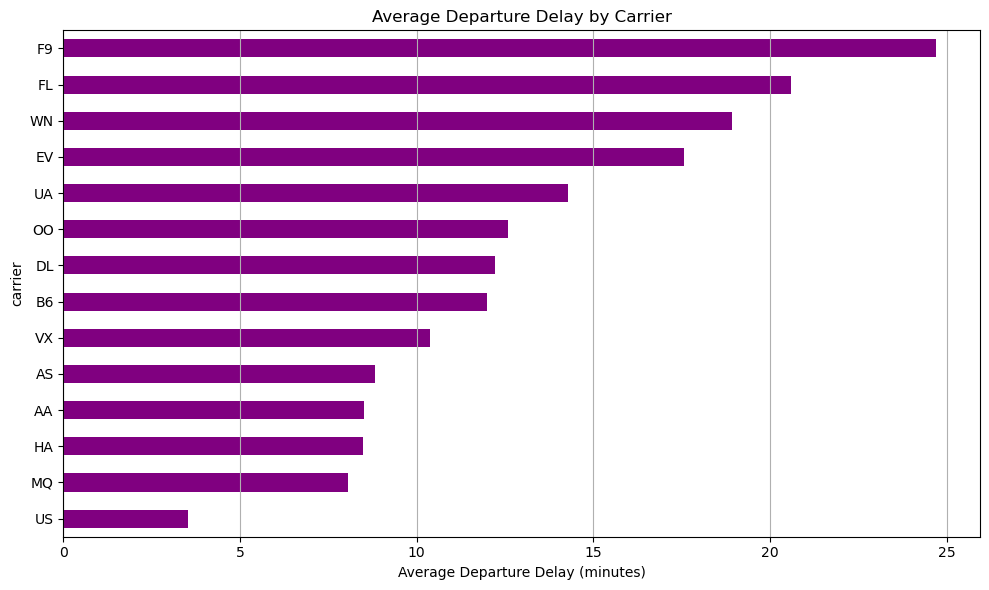

In [233]:
#Visualize 
import matplotlib.pyplot as plt

# Recreate the series (replace with your actual groupby output)
carrier_delay = Al.groupby('carrier')['dep_delay'].mean().sort_values()

# Plot as horizontal bar chart
carrier_delay.plot(kind='barh', color='purple', figsize=(10,6))
plt.xlabel("Average Departure Delay (minutes)")
plt.title("Average Departure Delay by Carrier")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()



In [235]:
#Summary 
#🟢 Best on-time performance: US (US Airways), MQ, and HA

#🔴 Worst delays: F9 (Frontier), FL (AirTran), and WN (Southwest)

#🟡 EV, UA, and DL show moderate delays

In [279]:
# Arrival vs. departure delays by carrier
delay_rate = (Al['dep_delay'] > 15).groupby(Al['carrier']).mean()
print(delay_rate.sort_values())

carrier
HA    0.084615
US    0.120000
VX    0.142381
AA    0.159918
AS    0.165505
OO    0.170000
DL    0.190725
MQ    0.197317
B6    0.209627
UA    0.236951
WN    0.283146
EV    0.283759
FL    0.295763
F9    0.403805
Name: dep_delay, dtype: float64


In [ ]:
#
delay_rate.sort_values().plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel('Proportion of Flights Delayed > 15 min')
plt.title('Departure Delay Rate by Carrier')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [281]:
#Combine Departure and Arrival Delays per Carrier

carrier_stats = Al.groupby('carrier')[['dep_delay', 'arr_delay']].mean().sort_values(by='arr_delay')
print(carrier_stats)


         dep_delay  arr_delay
carrier                      
AS        8.831010  -3.888502
US        3.516000   0.999761
VX       10.375860   3.250156
DL       12.209798   5.155267
AA        8.511121   5.463518
UA       14.296086   7.564528
MQ        8.059324   9.495770
B6       11.991007  10.182468
WN       18.931524  11.217526
HA        8.488462  12.450000
EV       17.561290  13.221452
FL       20.596323  13.673062
OO       12.575000  14.825000
F9       24.712474  26.608879


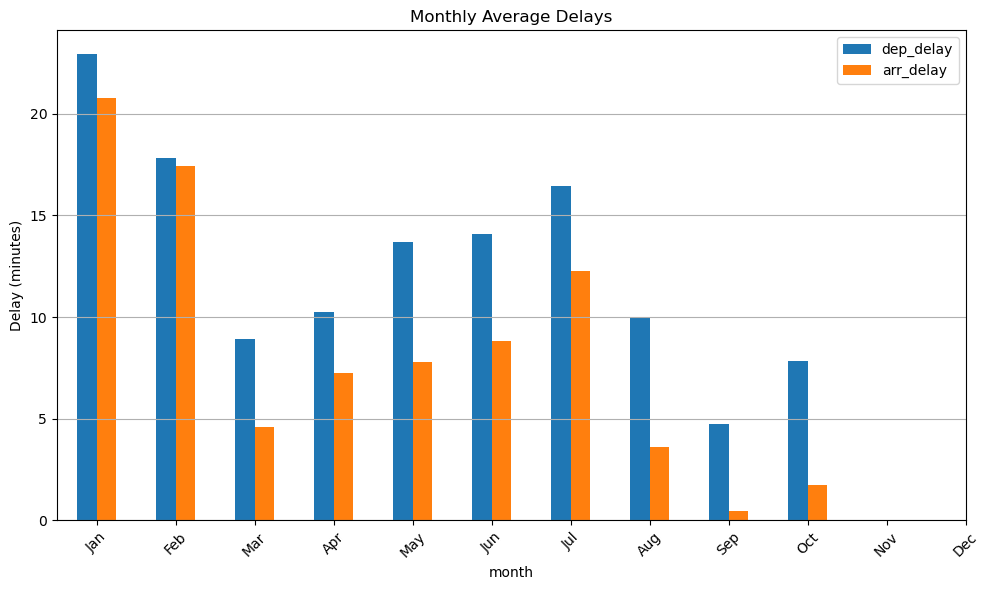

In [241]:
#Monthly Delay Trends
monthly_delay = Al.groupby('month')[['dep_delay', 'arr_delay']].mean()

monthly_delay.plot(kind='bar', figsize=(10,6), title="Monthly Average Delays")
plt.ylabel("Delay (minutes)")
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



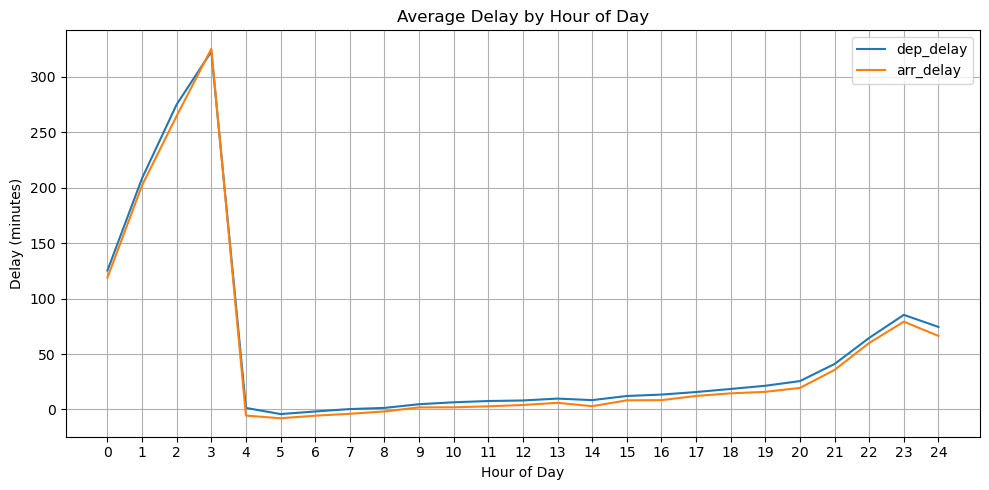

In [243]:
#Hourly Delay Analysis
hourly_delay = Al.groupby('hour')[['dep_delay', 'arr_delay']].mean()

hourly_delay.plot(figsize=(10,5), title="Average Delay by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Delay (minutes)")
plt.grid(True)
plt.xticks(range(0, 25))
plt.tight_layout()
plt.show()


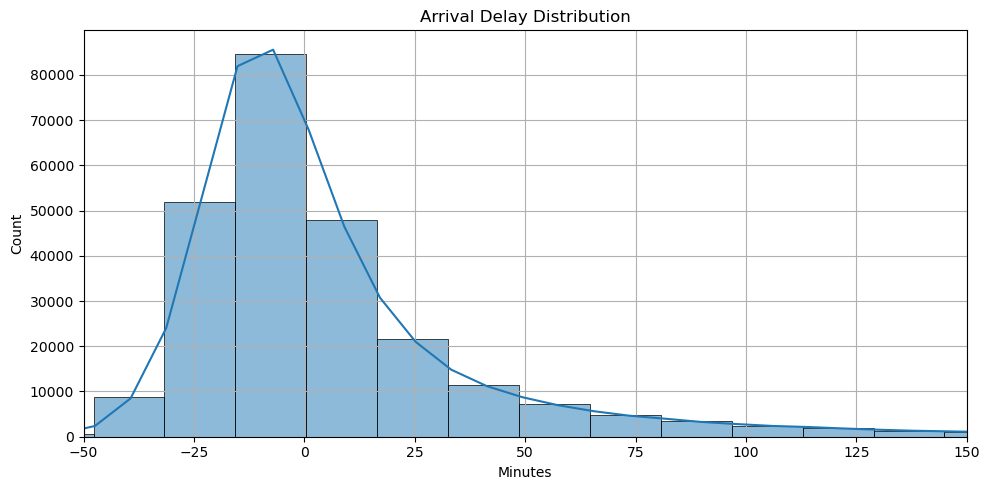

In [246]:
#Delay Distribution

plt.figure(figsize=(10,5))
sns.histplot(Al['arr_delay'], bins=100, kde=True)
plt.xlim(-50, 150)  # adjust as needed
plt.title("Arrival Delay Distribution")
plt.xlabel("Minutes")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
######### Most flights arrive on time or early ###########
# we can see the highest bar is near 0 minutes.Many flights arrive between -25 and 0 minutes, meaning they arrive early.Long right tail (positive skew):
#Fewer flights arrive significantly late (above 60–100 minutes).This is typical in flight data: while most delays are small, a few are very large.

##### Smoothed curve (KDE)##########
#The blue line on top of the bars is a kernel density estimate, giving a smoothed view of the distribution.
#It emphasizes that the peak is before or near 0.
#The tail on the right suggests that delays are more variable and can be extreme.

################## Summary  ##############
#Most flights arrive early or within a few minutes of scheduled time.
# A small number of flights experience significant delays, causing the right-skewed shape.



In [ ]:
#Thank you!!!!!!!